# Purpose:
The notebook is actively used to pass in datasets and run them through a series of instantiated off-the-shelf visualizations and algorithms in order to help get a first-pass understanding of the data and how different untuned estimators perform. The results are then used to provide initial directions of approach for more in-depth analysis.

The notebook begins with data visualization, preprocessing methods, and moves onto a number of different estimators and methods of evaluating estimator performance. A selection of favorite techniques receive in-depth explanation. [NOTE: If viewing on github, some browser+OS combinations render iPython LaTeX incorrectly (too small or with weird black lines, so the math in these analysis sections may disappear or look funny. Safari OSX seems to be one exception. This is an open problem.]

Currently, this notebook tests a large number of different statistical and machine learning methods on a dataset of red wines which contains, for each wine in row i, eleven descriptive characteristics and a score of overall wine quality as determined by a group of wine experts. We experiment with and compare the performance of a wide range of supervised learning algorithms (both regression and classification) since the labels are an integer score of 1-10.



## Data viz:
- Pairplots features against quality  
- Pairplots all features against all features  
- Violinplot  
- Correlation matrix heatmap  
- Scaled parallel coordinates, mean scaled parallel coordinates  
- Radviz  
- Gridsearch results  
- Score against # of folds, score against # neighbors in KNN  

## Algorithms:
- Linear Regression  
- Ridge Regression (L2 regularization)  
- Lasso (L1 regularization)  
- Elastic Net (L1 + L2 regularization)  
- KNN Regression  
- KNN Classification  
- Decision Tree Regression  
- Decision Tree Classification  
- Random Forest Classifier  
- Adaboost    
- SVM Regression (multiple kernels)   
- SVM Classification (multiple kernels)  

## Metrics & other:
- Custom test/train split
- Mean 0 unit variance scaling  
- MinMax scaling  
- Data normalization  
- PCA  
- K-folds CV  
- Stratified K-folds CV  
- Null Accuracy  
- Confusion Matrix  
- Polynomial Preprocessing for Regression  
- Grid Search  
- Iterate over number of K-folds  
- Iterate over number of neighbors for KNN  
- Iterate KNN gridsearch max score over # of folds  
  

In [39]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import cross_validation


In [110]:
# read in data: red and white data
# we'll focus on the reds dataset

wd = pd.read_csv('winequality-white.csv', sep=";")
rd = pd.read_csv('winequality-red.csv', sep=";")

rd[1:5]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [111]:
#sort by quality
rd = rd.sort_values(by='quality')

In [112]:
rd.sort_values(by='quality').head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1478            7.1             0.875         0.05             5.7      0.082   
832            10.4             0.440         0.42             1.5      0.145   
899             8.3             1.020         0.02             3.4      0.084   
1374            6.8             0.815         0.00             1.2      0.267   
459            11.6             0.580         0.66             2.2      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1478                  3.0                  14.0  0.99808  3.40       0.52   
832                  34.0                  48.0  0.99832  3.38       0.86   
899                   6.0                  11.0  0.99892  3.48       0.49   
1374                 16.0                  29.0  0.99471  3.32       0.51   
459                  10.0                  47.0  1.00080  3.25       0.57   

      alcohol  quality  
1478     10.2        3  
832       9.9        3  
899      11.0        3  
1374      9.8        3  
459       9.0        3

In [113]:
# have a look at the basic stats
rd.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
# closer look at variance
rd.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [114]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
# feature set
list(rd)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [127]:
# pairplot against wine quality

sb.pairplot(rd, x_vars=['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 ], y_vars='quality', kind='reg', size=2, aspect=1)

In [126]:
# pairplot against wine quality

sb.pairplot(rd, x_vars=['total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
], y_vars='quality', kind='reg', size=2, aspect=1)

In [125]:
# full feature pairplot

sb.pairplot(rd, hue='quality')

In [124]:
# feature violinplots

plt.figure(figsize=(20, 20))

for column_index, column in enumerate(rd.columns):
    if column == 'quality':
        continue
    plt.subplot(6, 2, column_index + 1)
    sb.violinplot(x='quality', y=column, data=rd)

KeyError: 'Level network must be same as name (None)'

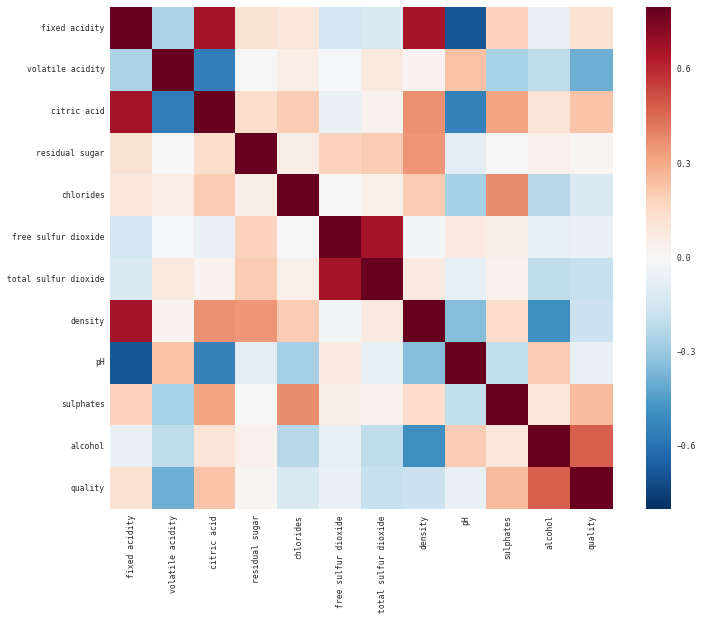

In [120]:
# correlation matrix

corrmat = rd.corr()
sb.set(context="paper", font="monospace")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

In [22]:
# before parallel cordinates, scale data

# scale all features between 1 and 0
def custom_scaler(df):
    for col in df:
        range_of_values = df[col].max() - df[col].min()
        score_minus_min = (df[col]) - (df[col].min())
        df[col] = score_minus_min / range_of_values     
    return df  

# create scaled rd dataframe
rd_copy = rd + 0
rd_custom_scaled = custom_scaler(rd_copy)

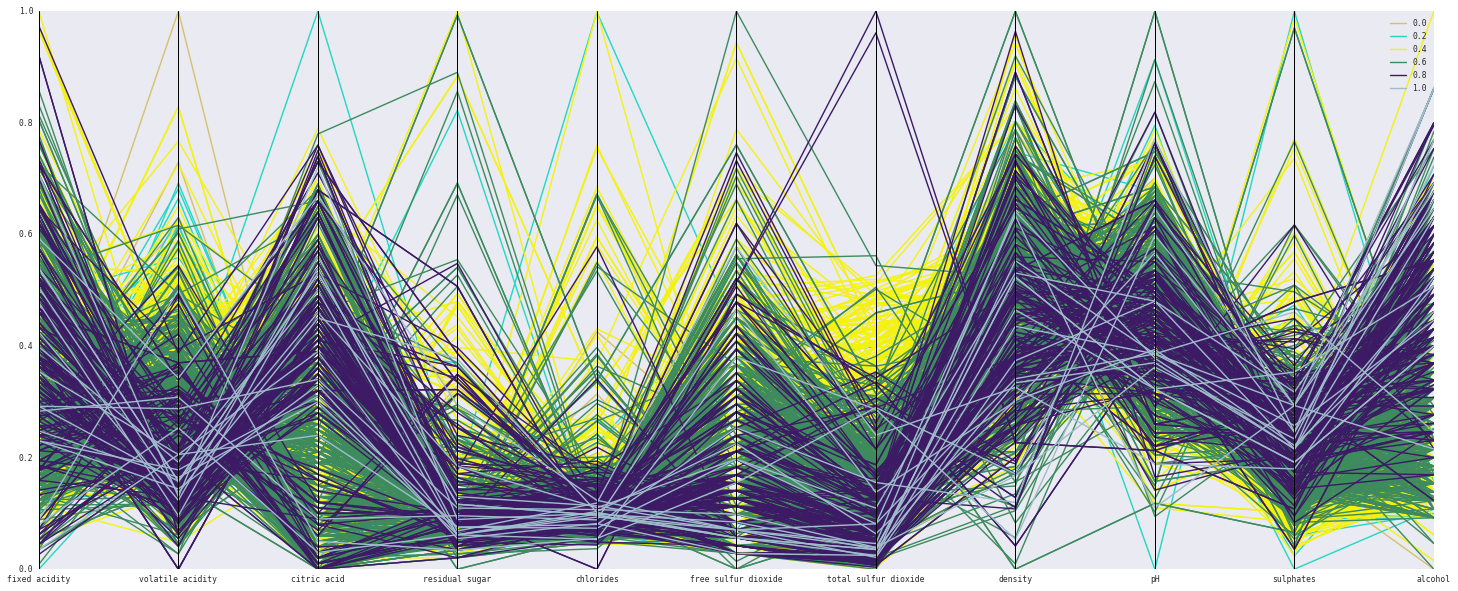

In [121]:
# parallel coordinates graph
from pandas.tools.plotting import parallel_coordinates

# plot
plt.figure(figsize=(25,10))
parallel_coordinates(rd_custom_scaled, 'quality')

In [24]:
# very interesting, but the default plot puts high quality wine plotlines on top of low quality wine plotlines
# so that the low quality wine data is hidden behind a thicket of plotpoints

# same graph, but with low quality wine data on top. this time, the light blue and purple lines will represent the
# worst quality wine:

# rewrite the red wine dataset with quality descending
rd_quality_descending = rd.sort_values(by='quality', ascending=False)

# scale
rd_quality_descending_scaled = custom_scaler(rd_quality_descending)

# plot
plt.figure(figsize=(25,10))
parallel_coordinates(rd_quality_descending_scaled, 'quality')


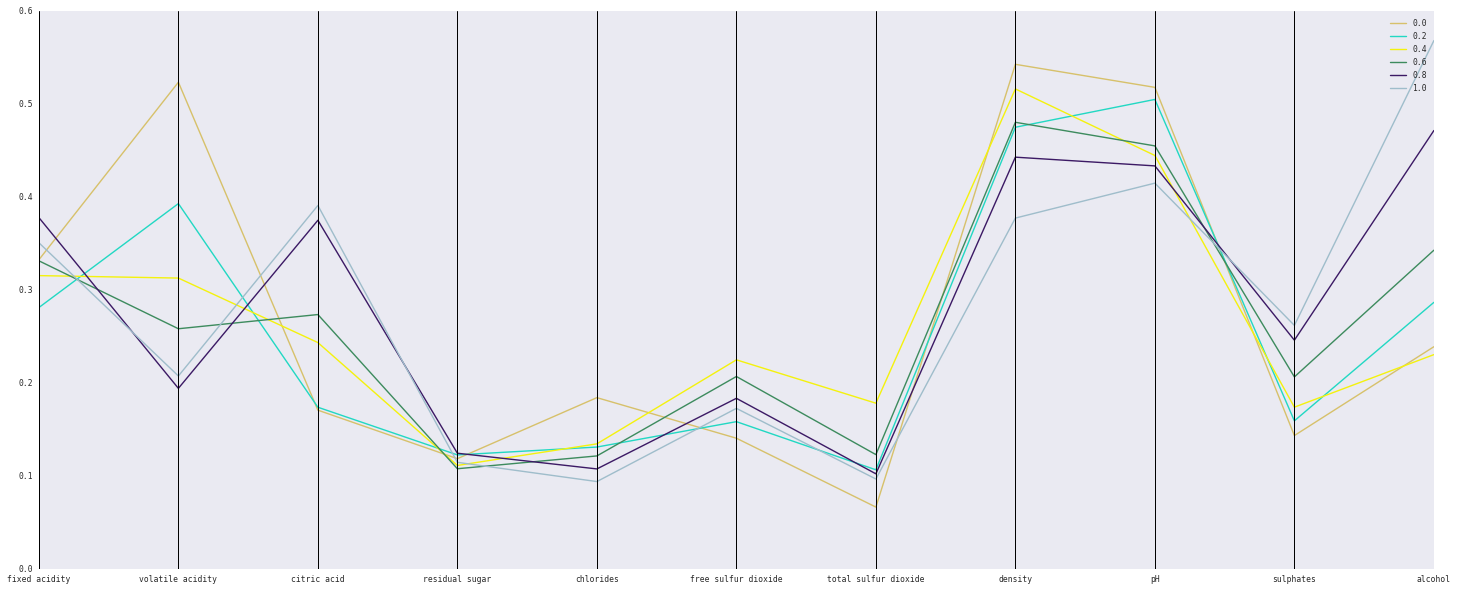

In [122]:
# parallel coordinates graph of mean value for each quality

# mean of scaled
rd_mean = rd_custom_scaled.groupby(['quality']).mean()

# add back in a quality score column after applying groupby
rd_mean['quality'] = [0,.2,.4,.6,.8,1]

# plot
plt.figure(figsize=(25,10))
parallel_coordinates(rd_mean, 'quality')



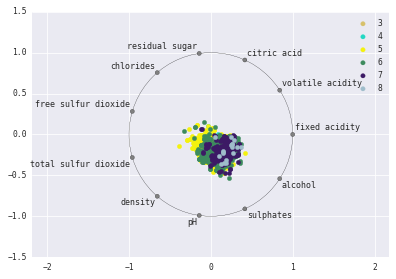

In [136]:
from pandas.tools.plotting import radviz

radviz(rd, "quality")

In [ ]:
# split into train and target, then provide scaled and normalized instances

y = rd['quality']
X = rd.drop('quality', 1)
X = X.as_matrix()
y = y.as_matrix()

# test split. we'll mostly use CV methods like k-folds, eliminating the need for manual data splitting 
# except in a few instances
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

#split the data
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

# scale data and target for PCA, SVM, rbf kernels, regularizers, etc.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


# scaled on default [0,1] or custom range
scale_range = (0,1)
X_MinMax_Scaled = MinMaxScaler(feature_range=scale_range).fit_transform(X)
y_MinMax_Scaled = MinMaxScaler(feature_range=scale_range).fit_transform(y)

# sphered data (centered at mean 0, unit variance). for sparse data, consider sklearn.preprocessing.RobustScaler
X_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(y)

# normalized data
X_scaled_norm = preprocessing.normalize(X_scaled, norm='l2')
y_scaled_norm = preprocessing.normalize(y_scaled, norm='l2')

# some classifiers expect a target classification of type integer, that is, it recognizes label
# type of int or string, but not float. after scaling y, the target values are floats, so we convert to string
# and store as a variable for later use (see SVM Classifier). For details, see "DataConversionWarning" in output 
y_str = y_scaled.astype('str')


# Principal Component Analysis (PCA)

[NOTE: If viewing on github, some browser+OS combinations render iPython LaTeX incorrectly. Safari OSX seems to be the one exception. As a result, the math in this section may disappear or look funny. This is an open problem.]

In PCA, we reduce the dimensionality of our dataset in a way that minimizes (certain aspects of) the amount of information we throw away by projecting our $p$-dimensional feature set onto a lower-dimensional subspace.

We take the mean-centered, normalized $pxn$ dataset $X$ with $p$ features and $n$ training examples. We apply principal component analysis (PCA) to project $p$-dimensional data into a q-dimensional sub-space where $q\leq p$.

PCA works by first computing the covariance matrix of our features (alternatively, computing the scatter matrix and scaling the eigenvalues later), the covariance matrix somewhat confusingly being denoted with sigma, not to be confused with summation notation: 

$$\Sigma = \sum\limits_{k=1}^{n} (x_k−m)(x_k−m)^T$$

where $x_k$ is a datapoint and $m$ is the $p$-dimensional vector of mean values across the $n$ examples. 

The diagonal values of the covariance matrix $\Sigma$ correspond to the variance of each feature, while the (symmetrical) off-diagonal values correspond to covariance between any two features. As a square, symmetric matrix, the covariance matrix can be readily used to find the set of $p$ scalar eigenvalues (corresponding to the new diagonal) and their corresponding eigenvectors, such that for all $v$ and $\lambda$: 

$$\Sigma v = \lambda v$$

where $v$ is one of our eigenvectors and $\lambda$ its corresponding eigenvalue

Now we have a set of eigenvectors in our $p$-dimensional space that will serve as the new orthogonal "axes" of of the $q$-dimensional features subspace. The computed eigenvalues have a magnitude that corresponds to the variance along each new "axis" of its associated eigenvector, so we can see that each axis "captures" a different amount of the information and diversity in our dataset. In the graph below, note the difference in how much data the 1st and 2nd dimension components catpure.

![Alt Text](http://weigend.com/files/teaching/stanford/2008/stanford2008.wikispaces.com/file/view/pca_example.gif)

What we would like to do is reduce the dimensionality of our dataset while controlling and minimizing the amount of information lost in doing so. The eigenvectors with the lowest eigenvalues generally have the least information about our dataset, so it makes most sense to eliminate these eigenvectors first. The sum of the eigenvalues is the total explained variance, and accordingly the percentage of explained variance associated with each eigenvector/eigenvalue pair is eigenvalue $\lambda$ divided by the total variance $\Sigma = \sum\limits_{i=1}^{p} \lambda_i$.  Looking at the eigenvalues sorted in descending order, we pick a subset such that the cumulative variance of the data is captured in our $q$-dimensional subspace up to a specified amount, e.g. we eliminate components such that at least 90% of the variance is retained, or until we are satisfied with the dimension of our new subspace.

We then transform the data by projecting it onto the q-dimensional subspace. Intuitively, we have created a new set of axes and kept the onces which do a good job of capturing the variance in our data. Each eigenvector is centered in our data "cloud," and we have chosen the axes within that cloud pointing in a $p$-dimensional direction that both maximizes the captured variance of our data and minimizes the distance between our new axis and the datapoints. To perform this last step, we create our new dataset $Y$ by taking our new $q$-dimensional matrix $W$, transposing it, and multiplying it with our original dataset:

$$Y = W^{T}X$$

Note that this process is not the same as feature selection; the orthogonal basis vectors we created do not directly correspond to specific features of the original dataset. Nor should PCA be used as a substitute for feature selection because while it does eliminate the dimensionality of the data, techniques specifically designed for this purpose such as L1 regulariation or library instances of feature selection should perform at least as well in doing so, and probably better. PCA is primarily employed to reduce the dimensionality of the data, agnostic of features, and for purposes of visualization.

In practice, singular value decomposition (SVD) also gets us eigenvectors and their corresponding eigenvalues, and is often used for computational precision due to possible rounding errors in the extra step of computing the covariance matrix. 


___

[An excellent step-by-step walkthrough in Python by Sebastian Raschka](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html#sections)

[A good set of answers and links for developing PCA "intuition"](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579)

* image source available in markdown

In [86]:
# Principal Component Analysis
from sklearn.decomposition import PCA

for n in range(1,11):
    pca = PCA(n_components=n, whiten=False)
    pca.fit(X_scaled_norm)
    X_reduce = pca.transform(X_scaled_norm)
    print n, "dimensions: %f%% variance captured" % (pca.explained_variance_ratio_.sum() * 100)

1 dimensions: 27.703540% variance captured
2 dimensions: 46.934650% variance captured
3 dimensions: 63.294030% variance captured
4 dimensions: 72.043277% variance captured
5 dimensions: 79.968698% variance captured
6 dimensions: 85.997884% variance captured
7 dimensions: 90.190792% variance captured
8 dimensions: 94.078600% variance captured
9 dimensions: 97.130112% variance captured
10 dimensions: 99.288200% variance captured


In [92]:
# transform data to desired degree
keep_dimensions=9
pca = PCA(n_components=keep_dimensions)
pca.fit(X)
X_pca = pca.transform(X)
print np.shape(X_pca)

(1599, 9)


null accuracy: predict 5 for every wine and be right 42.58912% of the time


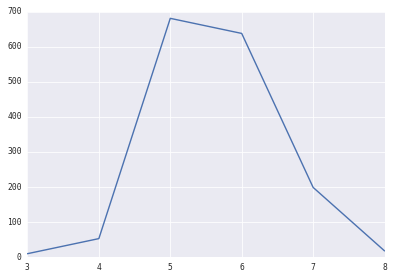

In [18]:
# distribution of wines quality scores
y1 = pd.Series(y)
values = pd.DataFrame(y1.value_counts())
plt.plot(values.sort_index())

# caculate null accuracy
null_accuracy = y1.value_counts().head(1) / len(y1)
print "null accuracy: predict 5 for every wine and be right %.5f%% of the time" % (null_accuracy * 100)

In [19]:
#quick check

print "Target vector:",y.shape
print "Feature matrix",X.shape

Target vector: (1599,)
Feature matrix (1599, 11)


In [43]:
# kfolds on linear regression
from sklearn import linear_model

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.40004144  0.26456988  0.33977338  0.40538395  0.21395995  0.29541643
  0.41695819  0.34149024  0.33511432  0.40965153]


Accuracy: 34.224% (+/- 6.496%)


In [44]:
# startified k folds on linear regression
from sklearn import linear_model

num_folds = 10
num_instances = len(X)
seed = 6
stratifiedkfold = cross_validation.StratifiedKFold(y, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False)

results = cross_validation.cross_val_score(model, X, y, cv=stratifiedkfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.36139017  0.38592894  0.35018887  0.3773134   0.29748722  0.24200208
  0.4167284   0.26897369  0.45134074  0.34356304]


Accuracy: 34.949% (+/- 6.157%)


## Regression Regularization

[NOTE: If viewing on github, some browser+OS combinations render iPython LaTeX incorrectly. Safari OSX seems to be the one exception. As a result, the math in this section may disappear or look funny. This is an open problem.]

Regularized regression aims to minimize overfitting by adding a regularization term to linear or logistic regression models. This regularization term is added to, in this instance, a standard least squares linear regression cost function $J$:



$$J(\Theta) = 1/2m [ \sum\limits_{i=1}^{m} (h_\Theta(x^i) - y^i)^2 + \lambda \sum\limits_{j=1}^{n} \Theta^2_j]$$

$\Theta$ = parameter values

$m$ = training examples with $n$ features

$h_\Theta(x^i)$ = the estimator $h_\Theta$ value for training example $i$

$y^i$ = the actual labeled value of training example $i$

$\lambda$ = regularization constant

The important thing to notice is the addition of $\lambda \sum\limits_{j=1}^{n} \Theta^2_j$. What is the effect of this term? When minimizing the cost as a function of our parameter values $\Theta$, smaller values of theta must be used than we would otherwise obtain under unregularized regression, and therefore we can diminish overfitting because the contribution of each feature is dampened. Under gradient descent, the cost function can be rearranged to isolate the regularization parameter such that when we update $\Theta_j$: 

$$\Theta_j := \Theta_j (1- \alpha\lambda / m) - \alpha /m \sum\limits_{i=1}^{m} (h_\Theta(x^i) - y^i)x^i_j$$

$\alpha$ = constant learning rate

(Note that we ignore the intercept value $\Theta_0$, which doesn't receive a regularization term)

This rearranged formulation gives us the first term $\Theta_j (1- \alpha\lambda / m)$, from which we can more readily interpret the effect that regularization parameter $\lambda$ has on the updated value of $\Theta_j$ and the contribution of feature set $m$ to the final prediction curve.

As if often the case, the best way to get an intution for how this performs on a given dataset is to plug in a couple of values for the regularization parameter $\lambda$ and maybe graph the effect for a range of values. For example, the image below shows a prediction curve that, without regularization, exhibits high variance and probably overfits the training data. If we set $\lambda=0$, we just have an unregularized gradient descent formula and an overfit estimator, seen on the left. Alternatively, if we set $\lambda = 10000$ (or some "very large" value relative to your data) then we have added a large regularization term to our cost function, and greatly diminished the initial value of $\Theta_j$ from which the prediction error is subtracted. The only way to minimize $J$ at this point is for the gradient descent method to "select" very small values of $\Theta$, thus minimizing the contribution that each feature has upon our prediction curve to such a degree that the estimator is all but unaffected by the data features, seen on the left. By tuning the regularization parameter, we can hope to achieve an estimator that does a better job of balancing variance and bias and hopefully generalizes well to new data, seen in the center.

![Alt Text](https://gigadom.files.wordpress.com/2014/01/41.jpg)

Thus, adding regularization to our regression estimator can in many instances give us a rough bias/variance dial with which we can address the overfitting of our estimator onto the training set.


### Lasso Regression (L1 Regularization) and Ridge Regression (L2 Regularization)

In discussing regularization we employed L2 regularization, also known as Tikhonov regularization and most well known as instantiated in Ridge Regression. This is one particular method of regularization. L1 regularization, most well-known in Lasso regression, is another such strategy for controlling overfitting. The two techniques share the same goal but differ in a few key respects. I find that it's somewhat easier to explore the specific properties of these different approaches when we put them side by side and can contrast their differences. Since we have covered in broad strokes what regularization is and why we use it, this section will focus on differences between L1 and L2 regularization.

Recall the regularized cost function above:

$$J(\Theta) = 1/2m [ \sum\limits_{i=1}^{m} (h_\Theta(x^i) - y^i)^2 + \lambda \sum\limits_{j=1}^{n} \Theta^2_j]$$

The regularization term used in the discussion above can now be introduced as, more specifically, the L2 regularization term:

$$\lambda \sum\limits_{j=1}^{n} \Theta^2_j$$

In contrast to the L1 regularization term:

$$\lambda \sum\limits_{j=1}^{n} |\Theta_j|$$


Clearly, the only difference between L1 and L2 is just that L2 uses the sum of the square of the parameters, while L1 is the sum of the absolute value of the parameters. However slight the difference might seem, there are some important consequences that should be considered before deciding which regression strategy to use. 

It's worth mentioning that although L1 and L2 regularization are probably the most discussed and well-known form of regularization, they are not the only forms. In fact, both L1 and L2 fit into the general class of loss function vector norms:

$$(\sum\limits_{j=1}^{n} |\Theta_j|^p)$$

where p=1 for L1 regularization and p=2 for L2 regularization.

### What happens to the parameters as regularization changes?

In many cases, L1 regularization will, with a high enough $\lambda$, reduce some parameters associated with a given feature to zero. In essence, L1 performs feature selection, and in practice, L1 is used on sparse datasets or on datasets where we would like to partially reduce the number of features. L2 regularization, on the other hand, will not set feature parameters to zero, but will only continue to reduce the value of a given $\Theta$. The following image demonstrates the contrast in parameter values for increasingly strict regularization. In both cases the parameter values approach zero as the regularization parameter is increased. Under L1 the coefficients hit zero, under L2 the coefficients diminish, but never hit zero:

![Alt Text](https://www.researchgate.net/publication/259550012/figure/fig4/AS:267784290566192@1440856158865/Figure-3-Regularization-path-for-the-Diabetes-data-set-for-the-lasso-left-and-ridge.png)

An explanation comes from examining the shape of the L1 and L2 regularization curves. For L1 regression, the absolute value loss function $L$ is a v shape, and its derivative with respect to the parameter (weight) $w$ is discontinuous 1 for positive values and -1 for negative values.

![Alt Text](http://i.stack.imgur.com/cmWO0.png)

For L2 regression, the absolute value loss function $L$ is curved, and its derivative with respect to the paramter (weight) $w$ is a v shape with slope 1 for positive values and slope -1 for negative values. 

![Alt Text](http://i.stack.imgur.com/n0t2F.png)

Recalling gradient descent minimization of the loss function, our parameters are updated according to this loss function. For L1 regularization, the stepwise reduction in $\Theta$ is each time a constant value, whereas for L2 regularization the stepwise reduction in value $\Theta$ is a constant value multiplied by the value of $\Theta$, thus the magnitude of each reduction in L2 regularization gets smaller and smaller for each step, approaching zero but never reaching it (for finite $\lambda$). 

Consider also that our regularized loss function: 

$$J(\Theta) = 1/2m [ \sum\limits_{i=1}^{m} (h_\Theta(x^i) - y^i)^2 + \lambda \sum\limits_{j=1}^{n} \Theta^p_j]$$

...can be rearranged once more in a manner that simply recastes the function as an unregularized loss function subject to the constraint:

$$\sum\limits_{j=1}^{n} \Theta^p_j \leq t$$

...where $t$ corresponds directly to $\lambda$. By recasting this as a constraint region for our loss function, we can now visualize the difference between L1 and L2 regularization ( readily extendable into any regularization number $p$ in $(\sum\limits_{j=1}^{n} |\Theta_j|^p)$:

![Alt Text](https://qph.ec.quoracdn.net/main-qimg-11f828e592317cc6cef7f30b941f3796?convert_to_webp=true)

Here the x- and y-axes represent the case of regularized regression with only two parameters $\beta_1$ and $\beta_2$, where $\hat{\beta}$ centered within the contour lines minimizes our unregularized least squares regression. The shaded region then represents the constraint of regularization $t$ given above. Regularized gradient descent seeks to minimize the loss function subject to the regularization constraint region (which expands or shrinks depending on the value of $t$ or, alternatively, $\lambda$), and therefore will settle where the two surfaces meet.  


### Elastic Net

The Elastic Net penalty is another interesting option for regularization. It combines both the L1 and L2 term in an attempt to combine their strengths:

$$\lambda \sum\limits_{j=1}^{p} (\alpha\Theta^2_j + (1-\alpha)|\beta_j|) $$

Specifically, the creators of the Elastic Net wanted to preserve the feature selection property of L1 regression while preserving grouping: if multiple variables are collinear, L1 tends to arbitrarily select one variable from that group while eliminating the others. In addition, L1 can lead to situations in which there is more than one prediction curve that appropriately minimizes the cost function. If L1 arbitrarily chooses one of those two, it is possible that a slight change in the value of one datapoint could cause the regression curve to "jump" to an entirely different curve because the new curve has suddenly had the minized cost fuction tipped in its favor.

Introducing L2 regularization helps to address the problems with L1 while preserving its feature selection property.

___

[Elements of Machine Learning, by HTF, Chapter 3.4 is a great resource](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization)

[Andrew Ng's machine learning lectures on regularization](https://www.coursera.org/learn/machine-learning/home/week/3)

[Presentation by Zou and Hastie, creators of Elastic Net](http://web.stanford.edu/~hastie/TALKS/enet_talk.pdf)

[Insightful discussion and links about L1 vs. L2 here...](http://stats.stackexchange.com/questions/45643/why-l1-norm-for-sparse-models)

[...and here](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization)

*image sources available in markdown


In [49]:
# k folds on ridge regression, check performance with L2 regularization
from sklearn import linear_model

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.RidgeCV(normalize=False)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.40252252  0.26411366  0.33831344  0.4082061   0.2150958   0.29802188
  0.4171128   0.34021428  0.33575812  0.41007839]


Accuracy: 34.294% (+/- 6.517%)


In [77]:
# try stratified k folds on linear ridge regression, this time preprocessing X to get polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# convert X to polynomial degree 2 form
degree = 1
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
print "Array X has shape:", np.shape(X)
print "Array X_poly with degree %d has shape:" %degree, np.shape(X_poly)

num_folds = 10
num_instances = len(X)
seed = 6
stratifiedkfold = cross_validation.StratifiedKFold(y, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.RidgeCV(fit_intercept=True, normalize=False)


results = cross_validation.cross_val_score(model, X_poly, y, cv=stratifiedkfold)

print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)


Array X has shape: (1599, 11)
Array X_poly with degree 1 has shape: (1599, 12)
Accuracy: 35.052% (+/- 6.107%)


In [51]:
# try hand-selecting features, label new set as X2

X2 = rd.drop(['quality','residual sugar','chlorides','free sulfur dioxide','pH'],1)

num_folds = 10
num_instances = len(X2)
seed = 6
stratifiedkfold = cross_validation.StratifiedKFold(y, n_folds=num_folds, random_state=seed, shuffle=True)

#try L2 regularization with a sparser feature set
model = sklearn.linear_model.RidgeCV(normalize=False)

#scoring
results = cross_validation.cross_val_score(model, X2, y, cv=stratifiedkfold)
print "Fold scores:", results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

#feature coefficients
model = model.fit(X, y)
print '\n'
print(40 * '-')
print "Parameter coefficients:"
pd.DataFrame(zip(list(X2),model.coef_))


Fold scores: [ 0.35546308  0.36992146  0.32875545  0.35525358  0.32406225  0.25699643
  0.43277408  0.23598666  0.44571807  0.3296179 ]


Accuracy: 34.345% (+/- 6.263%)


----------------------------------------
Parameter coefficients:


0         1
0         fixed acidity  0.009056
1      volatile acidity -1.099029
2           citric acid -0.187014
3  total sulfur dioxide  0.008843
4               density -1.829590
5             sulphates  0.004505
6               alcohol -0.003297

In [56]:
# lasso (L1 regularization) with our smaller, hand-picked feature set (X2)

# hand-selected features from above
X2 = rd.drop(['quality','residual sugar','chlorides','free sulfur dioxide','pH'],1)

num_folds = 10
num_instances = len(X2)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.Lasso(alpha=.01)

results = cross_validation.cross_val_score(model, X2, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.3842335   0.27007285  0.32142699  0.39591393  0.17649335  0.30514304
  0.39882258  0.29790053  0.3030387   0.39716977]


Accuracy: 32.502% (+/- 6.774%)


In [60]:
# elastic net (L1 and L2 regularization)

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.ElasticNet(alpha=.01, l1_ratio=0.5)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.39460639  0.26374052  0.32424054  0.39166999  0.17762252  0.30752224
  0.3962456   0.31079655  0.31117851  0.39846884]


Accuracy: 32.761% (+/- 6.773%)


In [156]:
np.shape(y)

(1599,)

In [224]:
# SVM regression

num_folds = 10
num_instances = len(X_scaled)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.svm.SVR(kernel='rbf', C=1, gamma='auto')

results = cross_validation.cross_val_score(model, X_scaled, y_scaled, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.44455217  0.41174253  0.41197978  0.45347426  0.31670841  0.29592278
  0.48292425  0.39960854  0.33220614  0.48030097]


Accuracy: 40.294% (+/- 6.382%)


In [146]:
#pd.DataFrame(X_scaled)
X_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [221]:
# k-nearest neighbors regression, since we happen to have labels that can be treated as continous (open set (1,10)) 
# or discrete (integer score of [1..10]) -- this problem can be treated as either classification or regression
from sklearn.neighbors import KNeighborsRegressor

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=7)


results = cross_validation.cross_val_score(model, X_scaled, y_scaled, cv=kfold)
#print results
#print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)



Accuracy: 30.488% (+/- 5.823%)


In [216]:
# SVM classification

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.svm.SVC(kernel='rbf', C=1, gamma='auto')

# Y = np.asarray(critics['fresh'], dtype="|S6")

results = cross_validation.cross_val_score(model, X_scaled, y_str, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.58125     0.68125     0.58125     0.625       0.61875     0.56875
  0.73125     0.6         0.65        0.63522013]


Accuracy: 62.727% (+/- 4.774%)


In [42]:
# decision tree regressor

from sklearn.tree import DecisionTreeRegressor

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = DecisionTreeRegressor(random_state=6, criterion='mse', splitter='best', max_depth=6)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)


[ 0.39965871  0.25962133  0.39854386  0.32647467  0.18565331  0.25547314
  0.30256257  0.31470946  0.12449723  0.27387663]


Accuracy: 28.411% (+/- 8.137%)


In [227]:
# decision tree classifier

from sklearn.tree import DecisionTreeClassifier

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = DecisionTreeClassifier(random_state=6, criterion='gini', splitter='best')

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

# visualization available here:
# http://scikit-learn.org/stable/modules/tree.html#tree


[ 0.6375      0.65        0.65625     0.64375     0.6         0.575
  0.59375     0.7         0.60625     0.66037736]


Accuracy: 63.229% (+/- 3.593%)


In [120]:
# random forest
from sklearn.ensemble import RandomForestClassifier

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = RandomForestClassifier(random_state=6, n_estimators=20, bootstrap=False)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.73125     0.7         0.73125     0.7125      0.7         0.64375
  0.7125      0.725       0.70625     0.67924528]


Accuracy: 70.417% (+/- 2.520%)


In [232]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = AdaBoostClassifier(base_estimator=RandomForestClassifier(), 
                           random_state=6, learning_rate=1, n_estimators=10)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.675       0.675       0.7         0.7         0.70625     0.61875
  0.7125      0.68125     0.6875      0.72327044]


Accuracy: 68.795% (+/- 2.765%)


In [68]:
# k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#knn
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print accuracy_score(y_test, y_pred)

0.504166666667


In [46]:
# find best neighbor size
k_range = range(1,40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
   

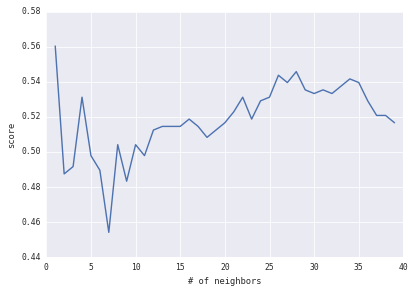

In [47]:
plt.plot(k_range,scores)
plt.xlabel("# of neighbors")
plt.ylabel("score")

In [49]:
# k-nearest neighbor with CV k-folds, optimizing number of folds
from sklearn.cross_validation import cross_val_score

fold_range = range(5,30)
scores = []
for f in fold_range:
    knn = KNeighborsClassifier(n_neighbors = 19)
    indscores = cross_val_score(knn, X, y, cv=f, scoring = 'accuracy')
    indscore = indscores.mean()
    scores.append(indscore)

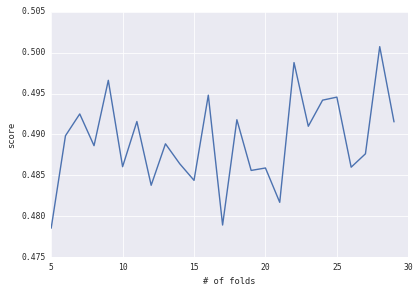

In [50]:
plt.plot(fold_range,scores)
plt.xlabel("# of folds")
plt.ylabel("score")

In [135]:
# gridsearch parameter tuning weights and # of neighbors
from sklearn.grid_search import GridSearchCV

k_range = range(1,25)
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights = weight_options)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 25, scoring='accuracy')
grid.fit(X,y)

print grid.best_score_
print grid.best_params_

#return best params on gridsearch, iterate over number of folds

0.555347091932
{'n_neighbors': 24, 'weights': 'distance'}


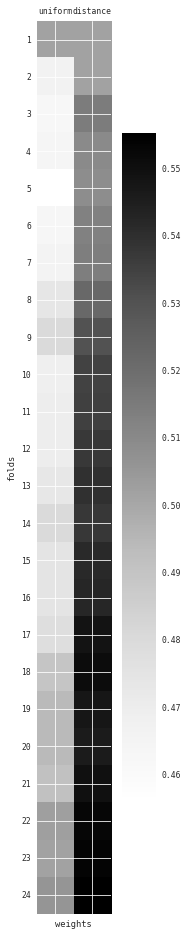

In [141]:
# practice visualizing gridsearch results

%matplotlib inline

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(24,2)

plt.matshow(scores)
plt.xlabel('weights')
plt.ylabel('folds')
plt.colorbar()
plt.xticks(np.arange(2), weight_options)
plt.yticks(np.arange(24), k_range);

In [52]:
# check best score returned by gridsearchcv over a range of values for # of folds

scores=[]
params=[]
f_range = range(15,25)
for f in f_range:
    k_range = range(1,40)
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights = weight_options)
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = f, scoring='accuracy')
    grid.fit(X,y)
    scores.append(grid.best_score_)
    params.append(grid.best_params_)
    
for n in zip(f_range,scores,params):
    print n

(15, 0.5434646654158849, {'n_neighbors': 35, 'weights': 'distance'})
(16, 0.55284552845528456, {'n_neighbors': 33, 'weights': 'distance'})
(17, 0.54846779237023136, {'n_neighbors': 33, 'weights': 'distance'})
(18, 0.54909318323952472, {'n_neighbors': 35, 'weights': 'distance'})
(19, 0.5522201375859912, {'n_neighbors': 33, 'weights': 'distance'})
(20, 0.55847404627892427, {'n_neighbors': 33, 'weights': 'distance'})
(21, 0.56285178236397748, {'n_neighbors': 39, 'weights': 'distance'})
(22, 0.56097560975609762, {'n_neighbors': 30, 'weights': 'distance'})
(23, 0.56160100062539087, {'n_neighbors': 33, 'weights': 'distance'})
(24, 0.56097560975609762, {'n_neighbors': 33, 'weights': 'distance'})


best score and # of neighbors: (0.56285178236397748, 21)


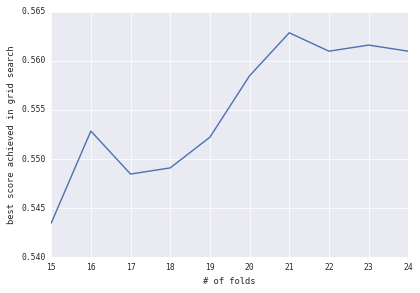

In [58]:
# plot best gridsearch score achieved for each # of folds

plt.plot(f_range,scores)
plt.xlabel("# of folds")
plt.ylabel("best score achieved in grid search")

print "best score and # of neighbors:", max(zip(scores,f_range))

[[  0   0   5   5   0   0]
 [  0   0  30  22   1   0]
 [  0   0 462 216   3   0]
 [  0   0 287 337  14   0]
 [  0   0  51 130  18   0]
 [  0   0   4  13   1   0]]


distribution of scores:


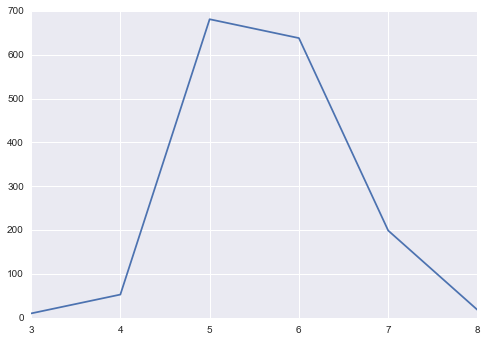

In [74]:
# confusion matrix

from sklearn import cross_validation
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 39)
knn.fit(X_train, y_train)
y_pred = cross_validation.cross_val_predict(knn, X, y, cv=21)

print metrics.confusion_matrix(y, y_pred)

y1 = pd.Series(y)
values = pd.DataFrame(y1.value_counts())
print "\n"
print "distribution of scores:"
plt.plot(values.sort_index())